In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kotesh Reddy\Downloads\archive (27)\EPL Standings 2000-2022.csv")

In [3]:
df.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


In [4]:
df.sample(10)

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
168,2008-09,9,West Ham United,38,14,9,15,42,45,-3,51,Not Applicable
398,2019-20,19,Watford,38,8,10,20,36,64,-28,34,Relegation to the EFL Championship
291,2014-15,12,West Ham United,38,12,11,15,44,47,-3,47,Qualification for the Europa League first qual...
32,2001-02,13,Fulham,38,10,14,14,36,44,-8,44,Qualification for the Intertoto Cup second round
149,2007-08,10,West Ham United,38,13,10,15,42,50,-8,49,Not Applicable
21,2001-02,2,Liverpool,38,24,8,6,67,30,37,80,Qualification for the Champions League first g...
107,2005-06,8,Bolton Wanderers,38,15,11,12,49,41,8,56,Not Applicable
213,2010-11,14,Bolton Wanderers,38,12,10,16,52,56,-4,46,Not Applicable
221,2011-12,2,Manchester United,38,28,5,5,89,33,56,89,Qualification for the Champions League group s...
418,2020-21,19,West Bromwich Albion,38,5,11,22,35,76,-41,26,Relegation to the EFL Championship


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


In [6]:
#Here we create column that contains the place of team
def update_res(res):
    if "Champions League" in res:
        res="Champions League"
    elif "UEFA" in res or "Europa" in res:
        res="Europa League"
    elif "Relegation" in res:
        res="Relegated"

    else:
        res="Nothing"
    return res
    

In [7]:
df["Qualification"] = df["Qualification or relegation"].apply(update_res)

In [8]:
df.isnull().sum()

Season                         0
Pos                            0
Team                           0
Pld                            0
W                              0
D                              0
L                              0
GF                             0
GA                             0
GD                             0
Pts                            0
Qualification or relegation    0
Qualification                  0
dtype: int64

In [9]:
df.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,Qualification
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,Champions League
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,Champions League
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,Champions League
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],Europa League
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],Europa League


In [10]:
df.drop("Qualification or relegation",axis=1,inplace=True)

In [11]:
df.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Champions League
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Champions League
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Champions League
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Europa League
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Europa League


In [12]:
df["Qualification"].value_counts()

Qualification
Nothing             220
Champions League     89
Europa League        68
Relegated            63
Name: count, dtype: int64

In [13]:
df[df["Team"]=="Manchester United"]

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Champions League
22,2001-02,3,Manchester United,38,24,5,9,87,45,42,77,Champions League
40,2002-03,1,Manchester United,38,25,8,5,74,34,40,83,Champions League
62,2003-04,3,Manchester United,38,23,6,9,64,35,29,75,Champions League
82,2004-05,3,Manchester United,38,22,11,5,58,26,32,77,Champions League
101,2005-06,2,Manchester United,38,25,8,5,72,34,38,83,Champions League
120,2006-07,1,Manchester United,38,28,5,5,83,27,56,89,Champions League
140,2007-08,1,Manchester United,38,27,6,5,80,22,58,87,Champions League
160,2008-09,1,Manchester United,38,28,6,4,68,24,44,90,Champions League
181,2009-10,2,Manchester United,38,27,4,7,86,28,58,85,Champions League


In [14]:
cl_qual = df[df["Qualification"]=="Champions League"]

In [15]:
cl_qual.groupby("Team").agg({"Qualification":"count"})

,Qualification
Team,
Arsenal,16
Chelsea,18
Everton,1
Leicester City,1
Liverpool,15
Manchester City,12
Manchester United,18
Newcastle United,2
Tottenham Hotspur,6


<Axes: xlabel='Team'>

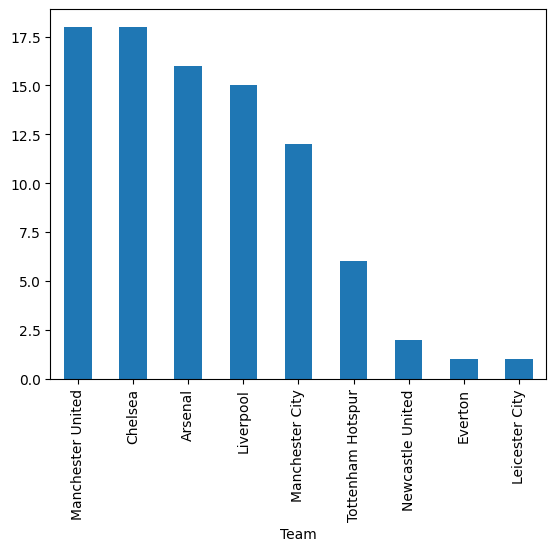

In [16]:
df[df["Qualification"]=="Champions League"]["Team"].value_counts().plot(kind='bar')

In [17]:
# Which team got most points in a season
df.groupby("Season").agg({"Pts":"sum"})

,Pts
Season,
2000-01,1039
2001-02,1039
2002-03,1050
2003-04,1032
2004-05,1030
2005-06,1063
2006-07,1042
2007-08,1040
2008-09,1043


In [18]:
sea = df.groupby(["Team","Season"])

In [19]:
sea

In [20]:
manu = df[df["Team"]=="Manchester United"]

In [21]:
manu

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Champions League
22,2001-02,3,Manchester United,38,24,5,9,87,45,42,77,Champions League
40,2002-03,1,Manchester United,38,25,8,5,74,34,40,83,Champions League
62,2003-04,3,Manchester United,38,23,6,9,64,35,29,75,Champions League
82,2004-05,3,Manchester United,38,22,11,5,58,26,32,77,Champions League
101,2005-06,2,Manchester United,38,25,8,5,72,34,38,83,Champions League
120,2006-07,1,Manchester United,38,28,5,5,83,27,56,89,Champions League
140,2007-08,1,Manchester United,38,27,6,5,80,22,58,87,Champions League
160,2008-09,1,Manchester United,38,28,6,4,68,24,44,90,Champions League
181,2009-10,2,Manchester United,38,27,4,7,86,28,58,85,Champions League


<Axes: xlabel='Season', ylabel='Pos'>

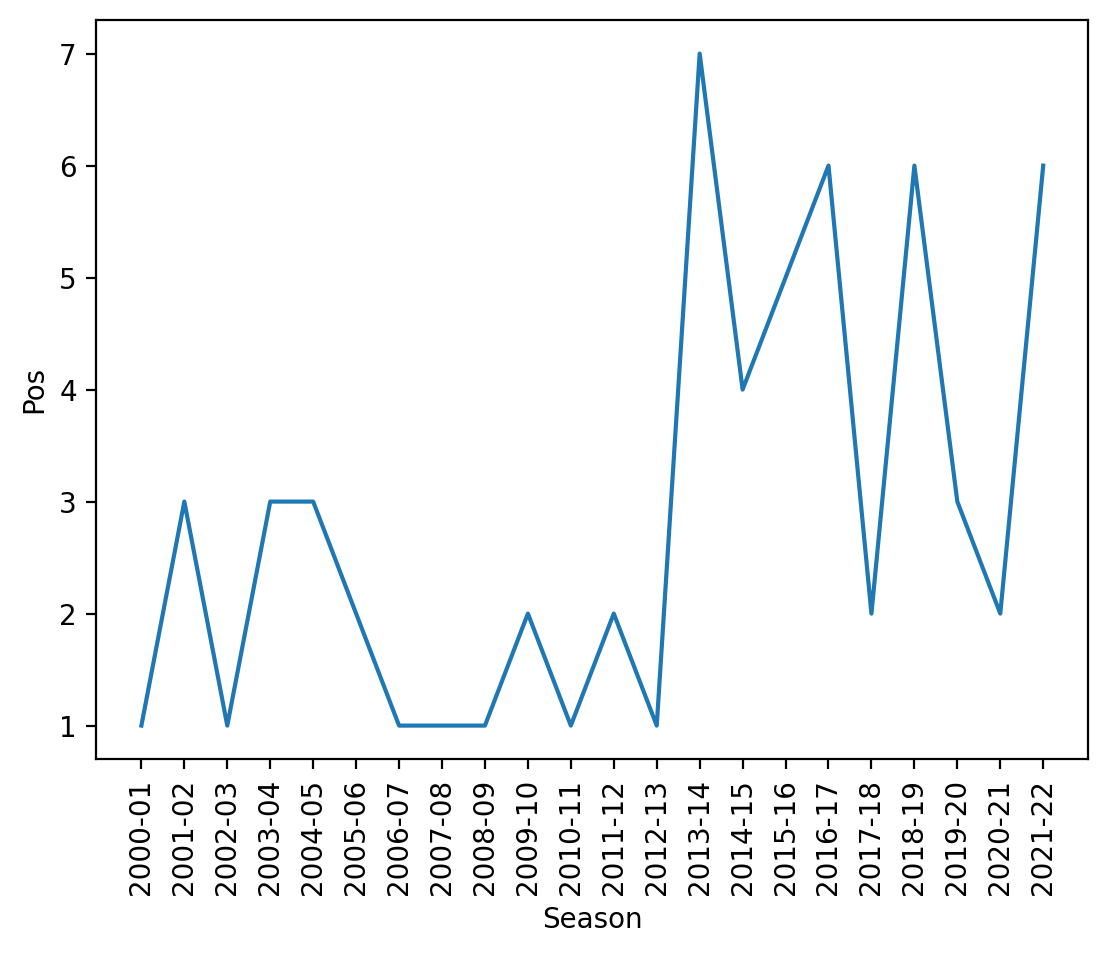

In [22]:
plt.figure(dpi=200)
plt.xticks(rotation=90)
sns.lineplot(x=manu["Season"],y=manu["Pos"])

In [23]:
df[df["Qualification"]=="Champions League"]["Team"].nunique()

9

In [24]:
champ = df[df["Qualification"]=="Champions League"]

In [25]:
champ

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Champions League
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Champions League
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Champions League
20,2001-02,1,Arsenal,38,26,9,3,79,36,43,87,Champions League
21,2001-02,2,Liverpool,38,24,8,6,67,30,37,80,Champions League
...,...,...,...,...,...,...,...,...,...,...,...,...
403,2020-21,4,Chelsea,38,19,10,9,58,36,22,67,Champions League
420,2021-22,1,Manchester City,38,29,6,3,99,26,73,93,Champions League
421,2021-22,2,Liverpool,38,28,8,2,94,26,68,92,Champions League
422,2021-22,3,Chelsea,38,21,11,6,76,33,43,74,Champions League


In [26]:
df = df.set_index("Season")

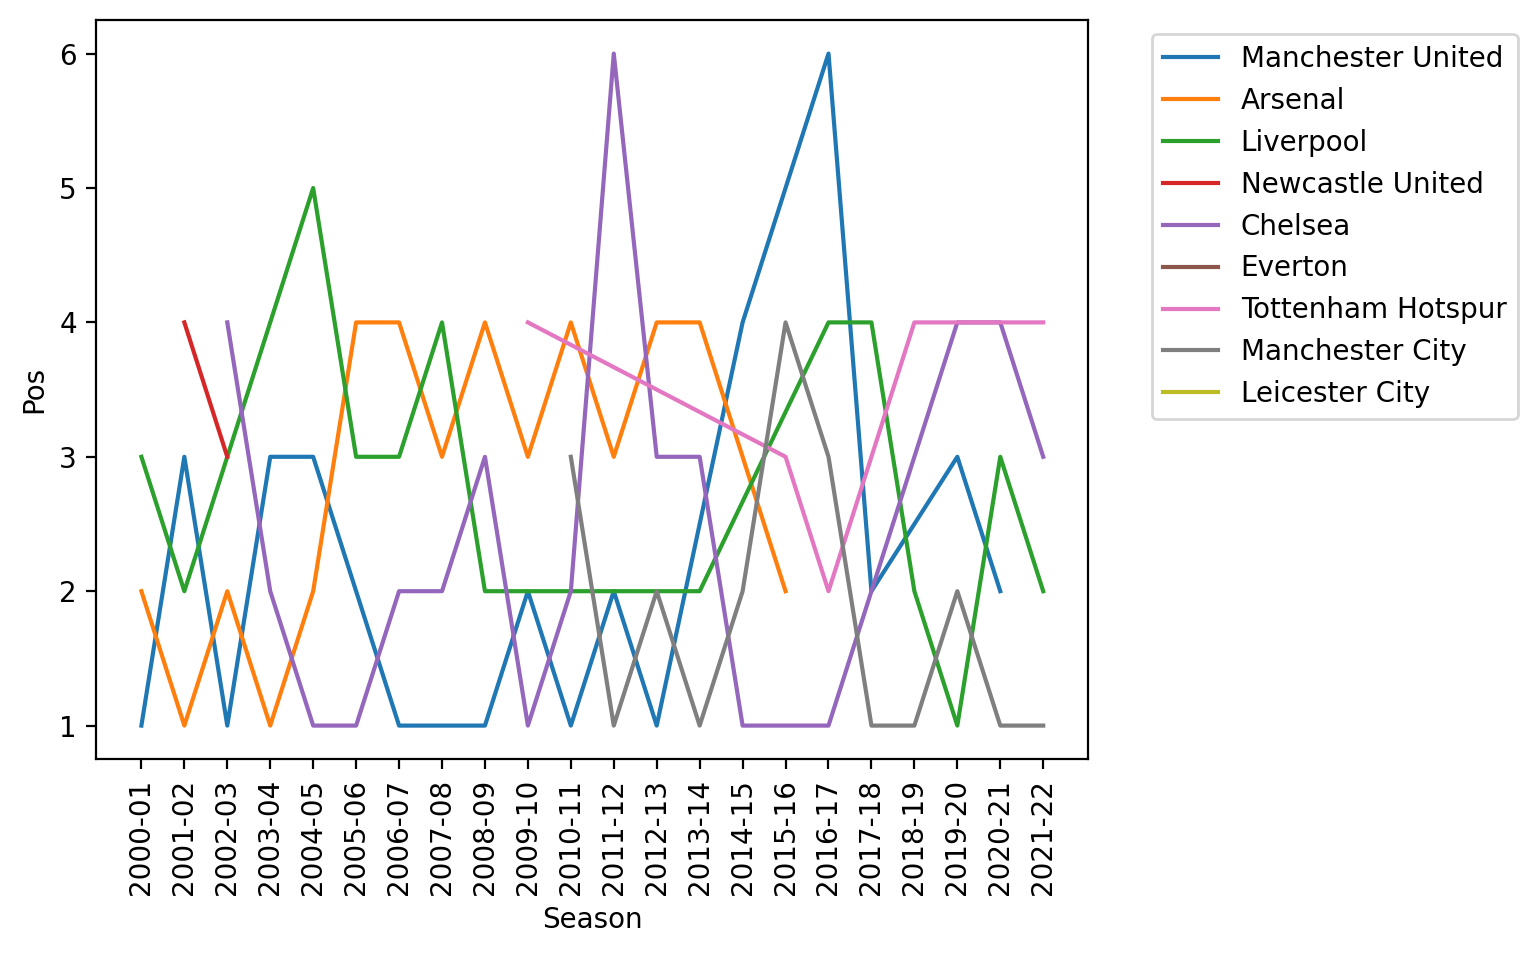

In [27]:
plt.figure(dpi=200)
plt.xticks(rotation=90)
sns.lineplot(data = champ,x="Season",y="Pos",hue="Team")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [28]:
pl_win = df.query('Pos==1')[["Team"]]

In [29]:
pl_win

,Team
Season,
2000-01,Manchester United
2001-02,Arsenal
2002-03,Manchester United
2003-04,Arsenal
2004-05,Chelsea
2005-06,Chelsea
2006-07,Manchester United
2007-08,Manchester United
2008-09,Manchester United


<Axes: xlabel='Team', ylabel='count'>

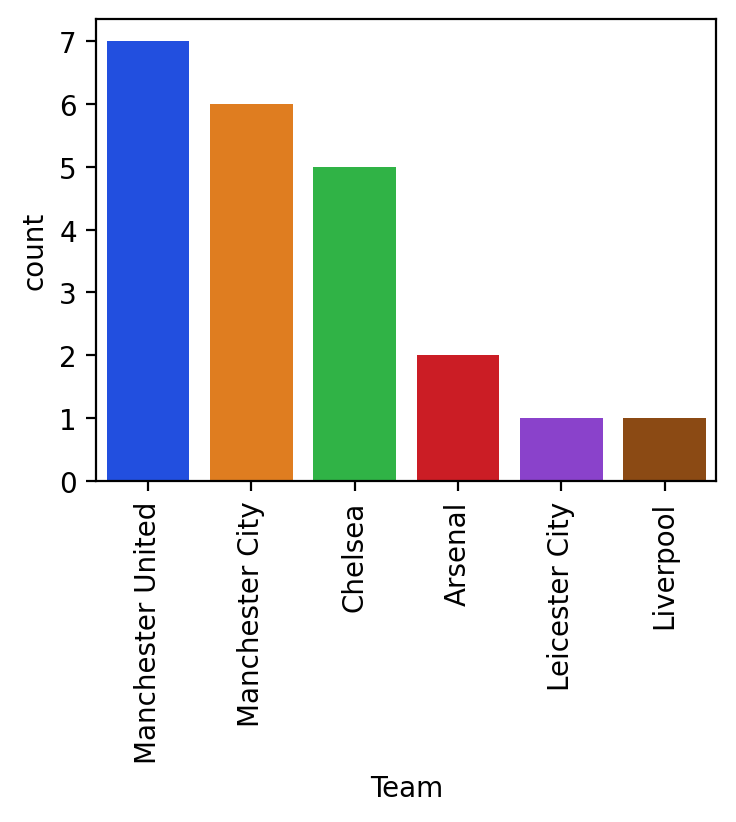

In [30]:
plt.figure(figsize=(4,3),dpi=200)
plt.xticks(rotation=90)
sns.barplot(df.query('Pos==1')["Team"].value_counts(),palette="bright")

In [31]:
df.head(7)

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification
Season,,,,,,,,,,,
2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Champions League
2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Champions League
2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Champions League
2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Europa League
2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Europa League
2000-01,6,Chelsea,38,17,10,11,68,45,23,61,Europa League
2000-01,7,Sunderland,38,15,12,11,46,41,5,57,Nothing


In [32]:
relegated = df[df["Qualification"]=="Relegated"]

<Axes: xlabel='Team'>

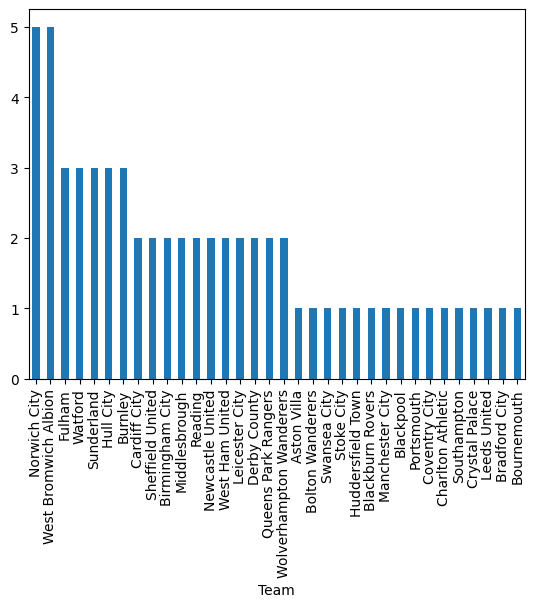

In [33]:
relegated["Team"].value_counts().plot(kind='bar')

In [34]:
noth = df[df["Qualification"]=="Nothing"]["Team"]

<Axes: xlabel='Team'>

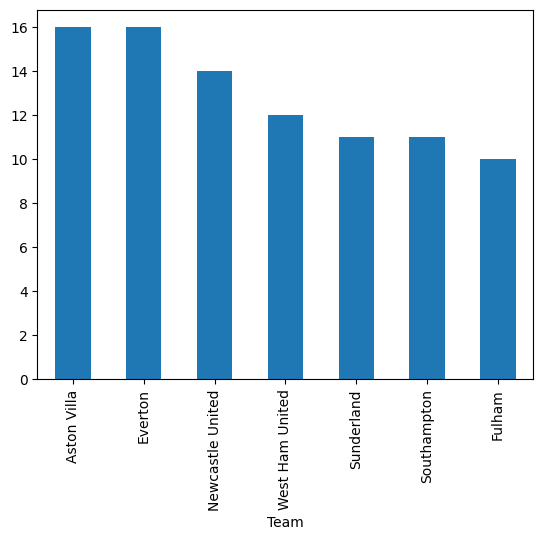

In [35]:
noth.value_counts()[:7].plot(kind='bar')

<Axes: xlabel='Team'>

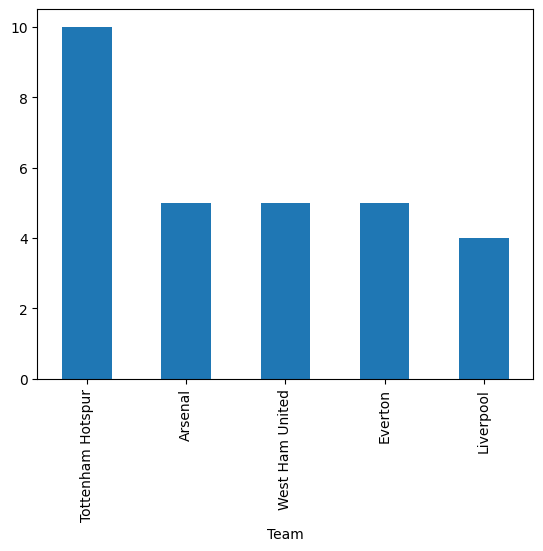

In [36]:
#Which Team has Qualified Europa League for most times
df[df["Qualification"]=="Europa League"]["Team"].value_counts()[:5].plot(kind='bar')

In [37]:
after_2010 = df[pd.to_numeric(df.index.str[:4])>=2010]

In [38]:
after_2010

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification
Season,,,,,,,,,,,
2010-11,1,Manchester United,38,23,11,4,78,37,41,80,Champions League
2010-11,2,Chelsea,38,21,8,9,69,33,36,71,Champions League
2010-11,3,Manchester City,38,21,8,9,60,33,27,71,Champions League
2010-11,4,Arsenal,38,19,11,8,72,43,29,68,Champions League
2010-11,5,Tottenham Hotspur,38,16,14,8,55,46,9,62,Europa League
...,...,...,...,...,...,...,...,...,...,...,...
2021-22,16,Everton,38,11,6,21,43,66,-23,39,Nothing
2021-22,17,Leeds United,38,9,11,18,42,79,-37,38,Nothing
2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegated


<Axes: xlabel='Team', ylabel='count'>

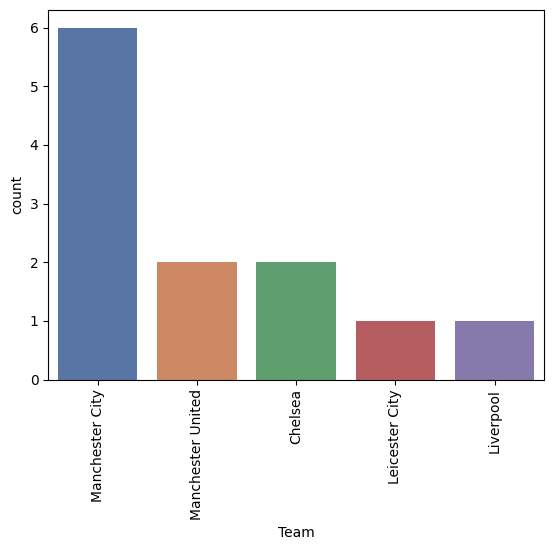

In [39]:
plt.xticks(rotation=90)
sns.barplot(after_2010.query('Pos==1')["Team"].value_counts(),palette="deep")

## From this data i got some points 

#### 1."In the last 22 years, Manchester United has been the most successful team in the Premier League, winning 7 times."
#### 2."However, Manchester United hasn't been as successful in the last 10 seasons as the were between 2000 and 2010."
#### 3."In the last 12 seasons, Manchester City has been the most successful team, winning 6 times."
#### 4."Manchester United and Chelsea are the teams that have qualified for the Champions League the most (16 times)."
#### 5."Tottenham Hotspur is the team that has qualified for the Europa League the most."
#### 6."Norwich City and West Bromwich Albion are the teams that have been relegated the most from the Premier League (5 times)."